In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering #Importing our clustering algorithm : Agglomerative

#1.dataset. 
data=pd.read_csv("CCGENERAL.csv")

In [2]:
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
# Looking at first few rows of dataset
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
# quick grab of data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
#Gives the numbers of rows and columns 
data.shape

(8950, 18)

In [6]:
#showcase specific informations about a specific column.
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
#Detect missing values.
data.isnull()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8946,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
8947,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8948,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
#Finding the number of missing values.
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
#replacing missing numerical values 
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(), inplace = True)

In [10]:
#replacing missing numerical values 
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean(), inplace = True)

In [11]:
#Finding the number of missing values.
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [12]:
#from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

data['CUST_ID']=encoder.fit_transform(data['CUST_ID'])
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   int32  
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [14]:
scaler=StandardScaler()
scaler.fit(data)
scaler.transform(data)

array([[-1.73185729, -0.73198937, -0.24943448, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [-1.73147024,  0.78696085,  0.13432467, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [-1.73108319,  0.44713513,  0.51808382, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [ 1.73108319, -0.7403981 , -0.18547673, ..., -0.33546549,
         0.32919999, -4.12276757],
       [ 1.73147024, -0.74517423, -0.18547673, ..., -0.34690648,
         0.32919999, -4.12276757],
       [ 1.73185729, -0.57257511, -0.88903307, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [15]:
from sklearn.cluster import AgglomerativeClustering #Importing our clustering algorithm : Agglomerative
model=AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(data)  #Applying agglomerative algorithm with 6 clusters, using euclidean distance as a metric

In [16]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,2
1,2
2,2
3,2
4,2
...,...
8945,2
8946,2
8947,2
8948,2


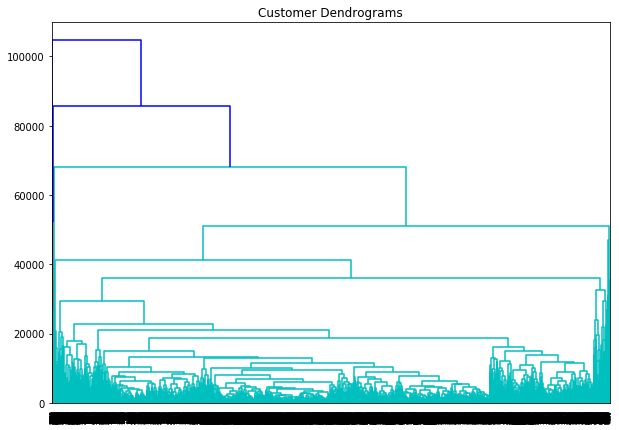

In [17]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
#shc.dendrogram(data, trancate_mode = 'lastp')
dend=shc.dendrogram(shc.linkage(data, method="complete"))

In [18]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

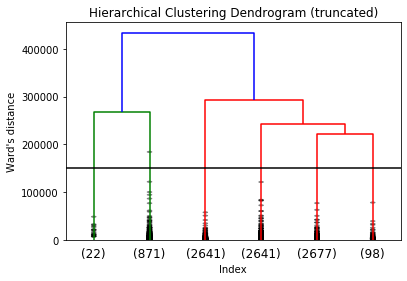

In [19]:
Z = linkage(data, 'ward')
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Index')
plt.ylabel("Ward's distance")
dendrogram(Z, truncate_mode='lastp',
           p=6, leaf_rotation=0., leaf_font_size=12.,
           show_contracted=True);
plt.axhline(150000, c='k');

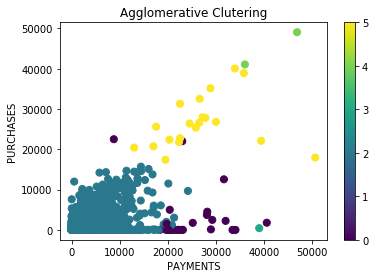

In [20]:
import matplotlib.pyplot as plt
fig= plt.figure()
ax=fig.add_subplot(111)
scatter=ax.scatter(data['PAYMENTS'],data['PURCHASES'],c= agglomerative[0],s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("PAYMENTS")
ax.set_ylabel("PURCHASES")
plt.colorbar(scatter)

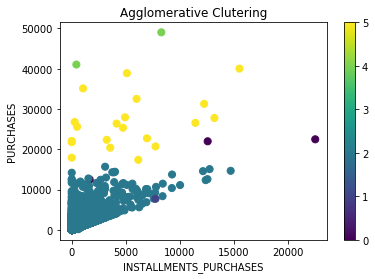

In [21]:
import matplotlib.pyplot as plt
fig= plt.figure()
ax=fig.add_subplot(111)
scatter=ax.scatter(data['INSTALLMENTS_PURCHASES'],data['PURCHASES'],c= agglomerative[0],s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("INSTALLMENTS_PURCHASES")
ax.set_ylabel("PURCHASES")
plt.colorbar(scatter)

In [29]:
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=5, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

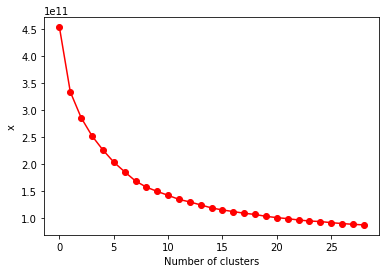

In [30]:
from sklearn.cluster import KMeans
x = []
for i in range( 1, 30 ):
    kmeans = KMeans(n_clusters=i, init="k-means++", n_init=10, max_iter=300) 
    kmeans.fit_predict( data)
    x.append( kmeans.inertia_ )
    
plt.plot( x, 'ro-', label="WCSS")
plt.xlabel("Number of clusters")
plt.ylabel("x")
plt.show()


In [31]:
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,8
1,28
2,3
3,3
4,8
...,...
8945,9
8946,9
8947,9
8948,9


In [32]:
kmeans.predict(data)
kmeans.cluster_centers_   #Printing the coordinates of cluster centers.

array([[ 2.34301550e+03,  9.63910728e+02,  8.33771829e-01,
         1.99008915e+03,  1.26898248e+03,  7.21106667e+02,
         3.73544139e+02,  6.96323690e-01,  4.61228566e-01,
         4.50857426e-01,  4.99764884e-02,  9.53488372e-01,
         2.50387597e+01,  1.60503876e+04,  2.60036124e+03,
         3.67676063e+02,  4.26110225e-01,  1.18062016e+01,
         4.00000000e+00],
       [ 5.87769658e+03,  7.50022762e+02,  8.57259634e-01,
         3.51851101e+02,  1.62249445e+02,  1.90055143e+02,
         3.86920744e+02,  4.00176080e-01,  1.07491453e-01,
         3.01964880e-01,  1.11890881e-01,  2.14708603e+00,
         7.42090657e+00,  1.87143848e+03,  7.02898237e+02,
         4.75340857e+02,  1.14226059e-01,  1.14061055e+01,
         1.00000000e+00],
       [ 3.98088444e+03,  1.72825868e+03,  8.77989138e-01,
         4.44227156e+02,  2.63849422e+02,  1.80532044e+02,
         3.77008681e+03,  2.67631049e-01,  1.30919498e-01,
         1.63726151e-01,  3.63324671e-01,  1.09555556e+01,
    

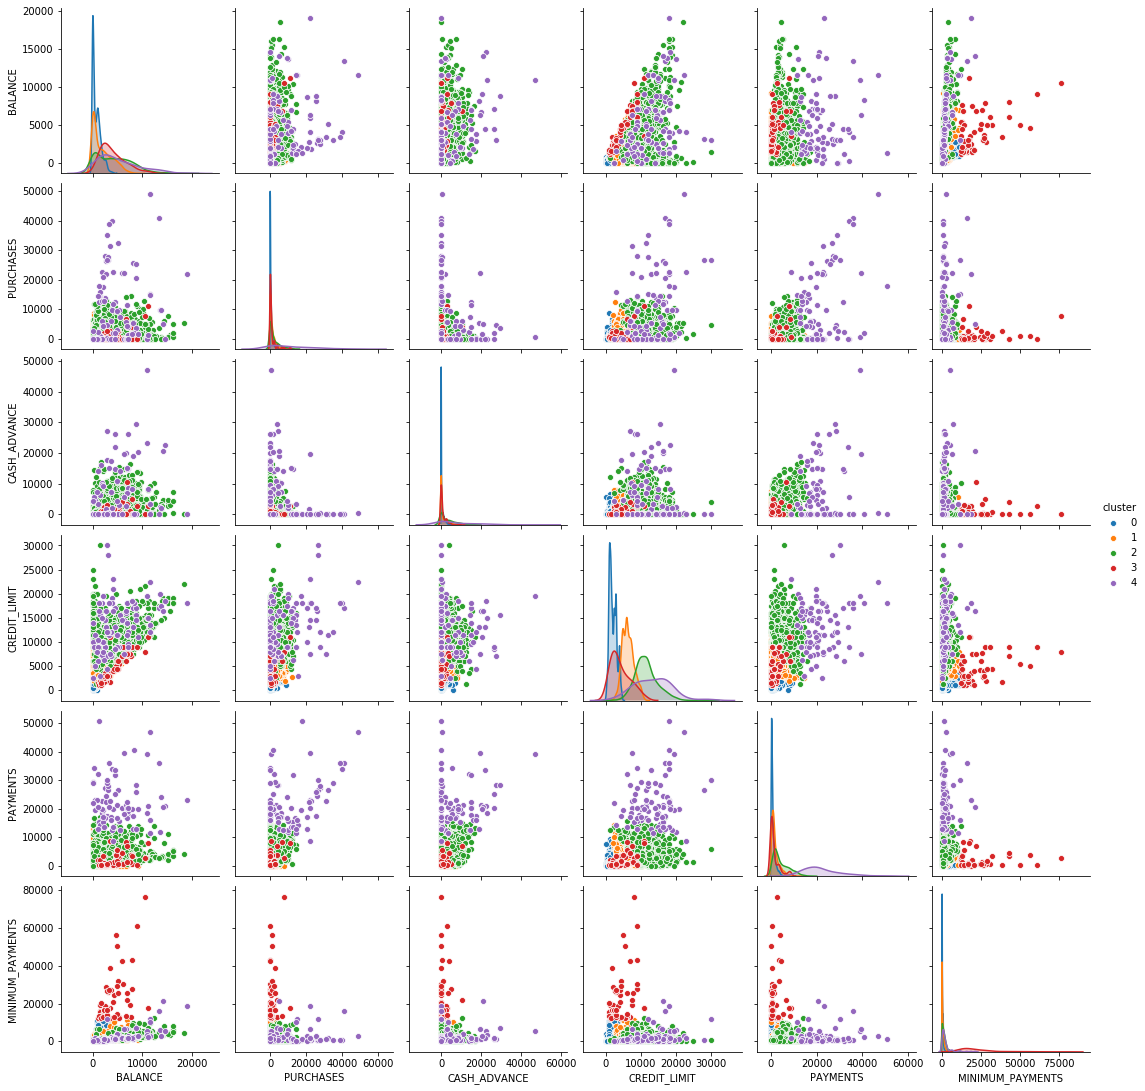

In [35]:
best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS"]
kmeans = KMeans(n_clusters=5, init="k-means++", n_init=10, max_iter=300) 
best_vals = data[best_cols].iloc[ :, 1:].values
y_pred = kmeans.fit_predict( best_vals )

data["cluster"] = y_pred
best_cols.append("cluster")
sns.pairplot( data[ best_cols ], hue="cluster")

In [42]:
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=4, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

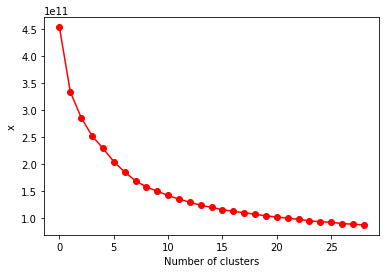

In [43]:
from sklearn.cluster import KMeans
x = []
for i in range( 1, 30 ):
    kmeans = KMeans(n_clusters=i, init="k-means++", n_init=10, max_iter=300) 
    kmeans.fit_predict( data)
    x.append( kmeans.inertia_ )
    
plt.plot( x, 'ro-', label="WCSS")
plt.xlabel("Number of clusters")
plt.ylabel("x")
plt.show()

In [44]:
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,4
1,14
2,24
3,24
4,4
...,...
8945,26
8946,26
8947,26
8948,26


In [45]:
kmeans.predict(data)
kmeans.cluster_centers_   #Printing the coordinates of cluster centers.

array([[ 2.38217073e+03,  1.04232477e+03,  8.76031339e-01,
         9.64741301e+02,  5.88720108e+02,  3.76021192e+02,
         3.18259826e+02,  5.77199014e-01,  3.31546285e-01,
         3.70945637e-01,  5.52467832e-02,  1.05420054e+00,
         1.50027100e+01,  9.94742547e+03,  1.36524889e+03,
         3.76621696e+02,  2.33476645e-01,  1.17506775e+01,
         2.00000000e+00],
       [ 6.99074914e+03,  8.95419751e+02,  8.18694564e-01,
         3.79202048e+02,  1.76081047e+02,  2.03718723e+02,
         7.35889046e+02,  4.13728759e-01,  1.05421888e-01,
         3.25381591e-01,  1.44630934e-01,  3.29919448e+00,
         8.13348677e+00,  3.33633168e+03,  7.46925060e+02,
         4.27642649e+02,  1.50661169e-01,  1.14614499e+01,
         1.00000000e+00],
       [ 3.04851128e+03,  3.16281662e+03,  8.93910970e-01,
         1.08924579e+03,  5.70337444e+02,  5.18908346e+02,
         2.85436781e+03,  4.58487917e-01,  2.23200023e-01,
         3.58786571e-01,  2.60222759e-01,  7.06766917e+00,
    

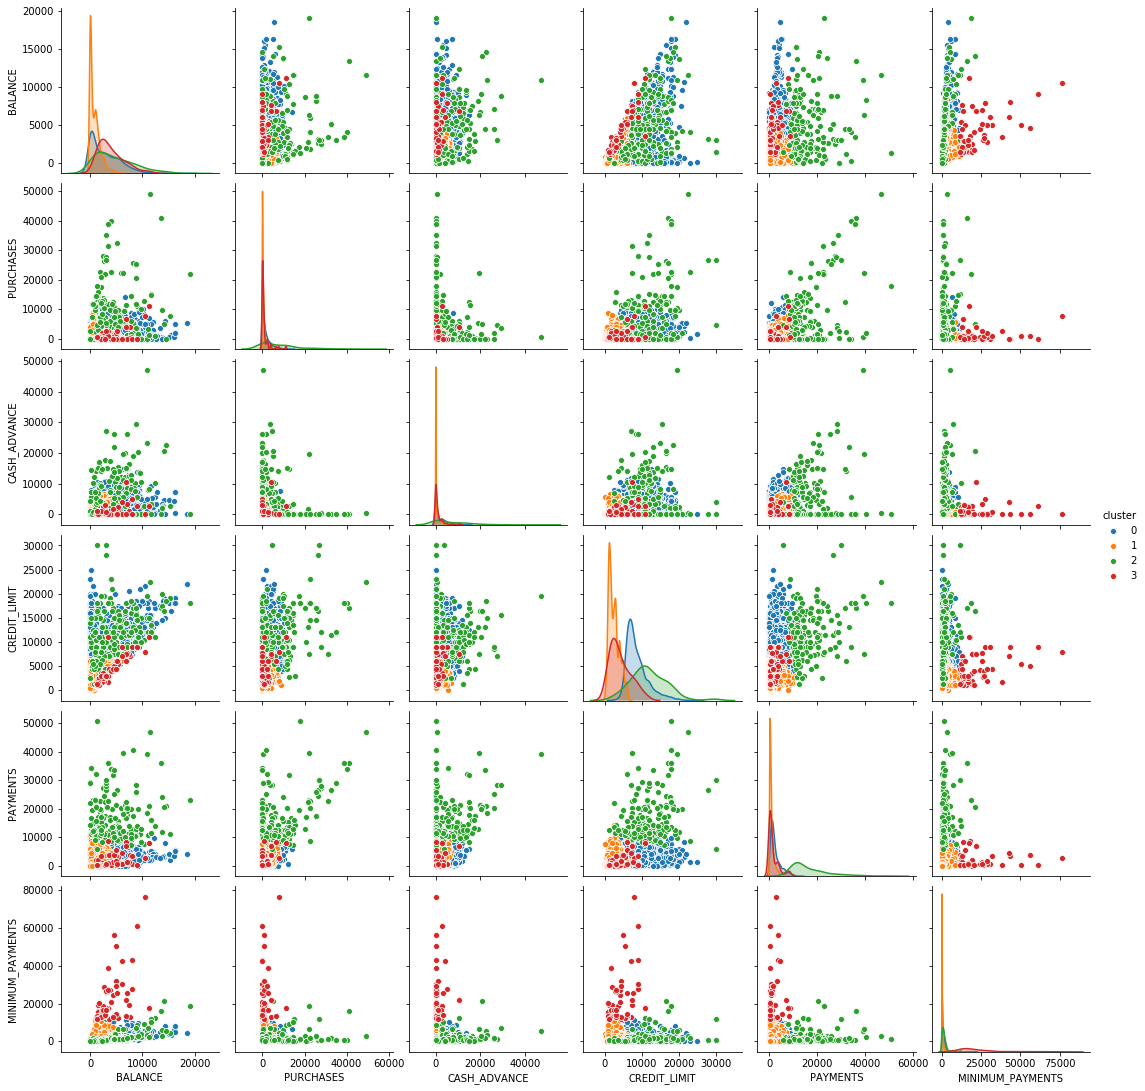

In [46]:
best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS"]
kmeans = KMeans(n_clusters=4, init="k-means++", n_init=10, max_iter=300) 
best_vals = data[best_cols].iloc[ :, 1:].values
y_pred = kmeans.fit_predict( best_vals )

data["cluster"] = y_pred
best_cols.append("cluster")
sns.pairplot( data[ best_cols ], hue="cluster")

In [47]:
from sklearn import metrics

In [50]:
# calculate SC for K=3 through K=12
k_range = range(2, 21)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(data)
    scores.append(metrics.silhouette_score(data, km.labels_))

In [51]:
scores

[0.427207227632638,
 0.37926827296704,
 0.24741237223377244,
 0.25512559913723876,
 0.25904265060146986,
 0.2673028778521232,
 0.27446832982680774,
 0.28010259706275736,
 0.2765526938608621,
 0.2791461051940065,
 0.2860807377029324,
 0.2067889872277626,
 0.27012754019214524,
 0.21430865678141994,
 0.2158774001250689,
 0.21148785825530605,
 0.21215954338835283,
 0.21958089919365376,
 0.21960171672007794]

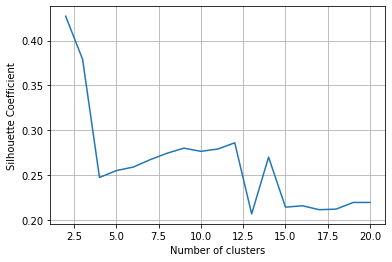

In [52]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)